In [1]:
import pandas as pd
import Utils
import Preprocess
import RetrievalMethods

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apostolos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data - Preprocessing - Statistics Extraction

In [2]:
passage_collection_file = '../dataset/passage_collection_new.txt'
test_queries_file = '../dataset/test-queries.tsv'
candidate_passages_top1000_file = '../dataset/candidate_passages_top1000.tsv'

In [3]:
passage_collection = Utils.read_collection(passage_collection_file)

In [4]:
### preprocess the passage sentences
preprocessed_passages = Preprocess.process_data(passage_collection,lemm = False)

In [5]:
print(preprocessed_passages[0:3])

[['this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'rna', 'definition'], ['best', 'answer', 'the', 'ar', 'designation', 'comes', 'from', 'the', 'name', 'of', 'the', 'company', 'that', 'produced', 'the', 'firearm', 'armalite', 'it', 'is', 'a', 'common', 'misconception', 'that', 'it', 'stands', 'for', 'assault', 'rifle', 'from', 'wikipedia', 'the', 'ar', '15', 'is', 'based', 'on', 'the', '7', '62mm', 'ar', '10', 'designed', 'by', 'eugene', 'stoner', 'of', 'the', 'fairchild', 'armalite', 'corporation'], ['what', 'does', 'ar', 'really', 'mean', 'posted', 'by', 'quality', 'ar', 'barrels', 'jul', '29', '2016', 'ar', 'articles', 'over', 'the', 'years', 'the', 'media', 'has', 'programmed', 'the', 'public', 'into', 'thinking', 'that', 'ar', 'stands', 'for', 'assault', 'rifle', 'this', 'is', 'not', 'the', 'case'

In [6]:
## find the frquency of each word on th passage collection
ordered_term_frequency_dictionary,total_words = Utils.derive_frequencies_from_collection(preprocessed_passages)

In [7]:
ordered_term_frequency_dictionary

[('the', 626892),
 ('of', 334283),
 ('a', 283558),
 ('and', 255211),
 ('to', 240943),
 ('is', 216851),
 ('in', 202175),
 ('for', 108167),
 ('or', 86924),
 ('you', 86652),
 ('that', 81084),
 ('are', 77176),
 ('it', 69548),
 ('on', 68236),
 ('as', 67752),
 ('your', 61565),
 ('with', 59497),
 ('s', 56348),
 ('by', 52045),
 ('an', 50108),
 ('can', 49971),
 ('be', 49110),
 ('from', 47956),
 ('1', 43967),
 ('this', 43533),
 ('at', 39432),
 ('2', 33875),
 ('have', 33377),
 ('not', 31856),
 ('if', 30447),
 ('will', 27760),
 ('one', 27299),
 ('was', 27110),
 ('which', 25851),
 ('name', 25102),
 ('i', 23897),
 ('more', 23607),
 ('has', 23295),
 ('3', 22569),
 ('also', 21757),
 ('but', 21569),
 ('when', 21533),
 ('number', 21351),
 ('all', 20578),
 ('may', 20556),
 ('other', 19958),
 ('most', 19822),
 ('about', 18979),
 ('they', 18620),
 ('there', 17480),
 ('cost', 17128),
 ('how', 16568),
 ('used', 16542),
 ('than', 16226),
 ('first', 16111),
 ('what', 15968),
 ('4', 15267),
 ('blood', 15117),
 

R^2 coefficient is: 0.9806957054501977
Linear Model Weight: -1.6509141751716523
Linear Model Bias: 2.9750585157493923


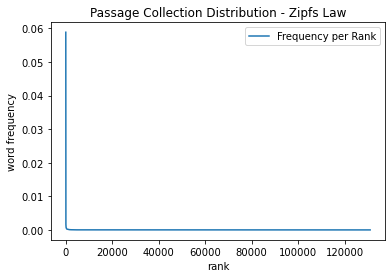

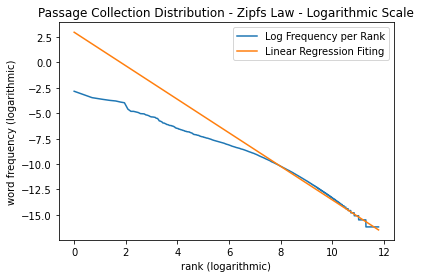

Mean Value: 0.023589156248150025
Std: 0.02364160593247986


In [8]:
Utils.plot_word_frequencies(ordered_term_frequency_dictionary,total_words)

In [9]:
## read the data
test_queries_df = pd.read_csv(test_queries_file, sep='\t', lineterminator='\n')
candidate_passages_top1000_df = pd.read_csv(candidate_passages_top1000_file, sep='\t', lineterminator='\r')

/home/apostolos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
## set column names
test_queries_df.columns = ['qid','query']
candidate_passages_top1000_df.columns = ['qid','pid','query','passage']

## Retrieval Models and Experiments

In [11]:
## create dictionaries with the data_given
query_dict, test_queries_dict, passages_dict, query_passage_dict = Utils.get_dictionaries(candidate_passages_top1000_df,test_queries_df)

In [19]:
candidate_passages_top1000_df.loc[candidate_passages_top1000_df['qid'] == 1112389]

,qid,pid,query,passage
548,1112389,8425082.0,"what is the county for grand rapids, mn","Shellsburg, Iowa is located a short distance w..."
656,1112389,8429763.0,"what is the county for grand rapids, mn",By Rachel Smith. @Rachel71. This recipe comes ...
928,1112389,7176887.0,"what is the county for grand rapids, mn","Fowling is coming to the Grand Rapids area, bu..."
1126,1112389,5192857.0,"what is the county for grand rapids, mn","Thank you! By submitting your email address, y..."
1141,1112389,7188591.0,"what is the county for grand rapids, mn",Network; Plans; Priority Health Services is no...
...,...,...,...,...
130245,1112389,6163992.0,"what is the county for grand rapids, mn",I need to figure out how the jet stream affect...
130259,1112389,6916766.0,"what is the county for grand rapids, mn",The Lyon County Sheriff’s Department is locate...
130320,1112389,3226484.0,"what is the county for grand rapids, mn",McKay was later able to trace the source of th...
130574,1112389,6929200.0,"what is the county for grand rapids, mn","Fire-safe hotels and motels in Grand Rapids, M..."


In [20]:
candidate_passages_top1000_df

,qid,pid,query,passage
0,1128373,7130104.0,iur definition,This is the definition of RNA along with examp...
1,131843,7130104.0,definition of a sigmet,This is the definition of RNA along with examp...
2,20455,7130335.0,ar glasses definition,Best Answer: The AR designation comes from the...
3,719381,7130335.0,what is ar balance,Best Answer: The AR designation comes from the...
4,20455,7130336.0,ar glasses definition,What does AR really mean? Posted by Quality AR...
...,...,...,...,...
189872,\n1132213,7998257.0,how long to hold bow in yoga,You may be surprised that to learn that yoga t...
189873,\n324211,7998651.0,how much money a united airline get as a capta...,Find cheap airline tickets & deals on flights ...
189874,\n1116341,7998709.0,closed ended mortgage definition,"What is a wrap-around mortgage, and who is it ..."
189875,\n1124145,7998901.0,truncating meaning,Katie The name Katie is a baby girl name. Mean...


In [21]:
test_queries_dict.get(1112389)

'what is the county for grand rapids, mn\r'

In [22]:
print(query_passage_dict.get(1112389))
print(len(query_passage_dict.get(1112389)))

[8425082.0, 8429763.0, 7176887.0, 5192857.0, 7188591.0, 8451301.0, 8451303.0, 7195768.0, 8452814.0, 8059119.0, 7211038.0, 8060367.0, 8060368.0, 8060371.0, 8061459.0, 5222234.0, 522356.0, 8486308.0, 8501535.0, 8097869.0, 7273761.0, 7274255.0, 7276950.0, 8138750.0, 8138764.0, 8141288.0, 814747.0, 7344028.0, 8178506.0, 735949.0, 5340373.0, 8191059.0, 8191060.0, 8204295.0, 5356573.0, 5372946.0, 8640354.0, 5382198.0, 7417864.0, 8258542.0, 7463271.0, 8705782.0, 5486122.0, 5486123.0, 7523038.0, 8758531.0, 5502049.0, 8341440.0, 877353.0, 7558111.0, 7567075.0, 8363366.0, 8814280.0, 8817196.0, 899639.0, 902455.0, 1422897.0, 1422900.0, 1423127.0, 1423458.0, 1429212.0, 5984843.0, 5984846.0, 5992574.0, 1437678.0, 1449007.0, 6383165.0, 6042406.0, 6064419.0, 6064420.0, 1521558.0, 6082981.0, 6083131.0, 6128824.0, 648294.0, 6496650.0, 1580790.0, 6163987.0, 6199118.0, 6199119.0, 621345.0, 6221200.0, 6592812.0, 1690911.0, 6665685.0, 666933.0, 1722347.0, 6688532.0, 1745424.0, 6697784.0, 1761071.0, 307967.

In [23]:
## preprocess the query
preprocessed_queries_dict = Utils.preprocess_queries(test_queries_dict)

In [24]:
preprocessed_queries_dict.get(1112389)

['counti', 'grand', 'rapid', 'mn']

In [25]:
RetrievalMethods.Retrieval_Pipeline(preprocessed_queries_dict,passages_dict,query_passage_dict,'Lindstone',0.5)

Processing query 1112389
{'shellsburg': {8425082.0: 1}, 'iowa': {8425082.0: 1, 1690911.0: 2, 281773.0: 1, 1917156.0: 3, 213302.0: 3, 2146077.0: 2, 1690909.0: 2, 1690914.0: 2, 6199120.0: 1, 1241172.0: 2, 1390157.0: 3, 3702304.0: 1}, 'locat': {8425082.0: 1, 8501535.0: 1, 814747.0: 1, 8178506.0: 2, 5340373.0: 3, 5382198.0: 1, 7417864.0: 2, 8341440.0: 1, 877353.0: 1, 1422900.0: 1, 1429212.0: 1, 5984843.0: 1, 5992574.0: 1, 6064419.0: 4, 6064420.0: 4, 6221200.0: 1, 1690911.0: 1, 3146289.0: 1, 3146293.0: 1, 2436039.0: 1, 3345028.0: 1, 3394193.0: 1, 3445871.0: 1, 3454424.0: 2, 1015764.0: 1, 7198424.0: 1, 7198431.0: 2, 7651153.0: 1, 7296920.0: 1, 1184965.0: 1, 1213306.0: 1, 7784504.0: 1, 7400877.0: 1, 7442929.0: 1, 7524966.0: 1, 2633766.0: 3, 2665024.0: 2, 285724.0: 1, 3699518.0: 2, 2472199.0: 1, 2472200.0: 1, 37682.0: 2, 7651157.0: 1, 7651158.0: 1, 1917156.0: 1, 7743807.0: 1, 7756076.0: 2, 7756079.0: 1, 2026609.0: 1, 2050726.0: 1, 212588.0: 2, 7909647.0: 1, 2140793.0: 1, 2140801.0: 1, 2157726.

[(4931198.0, -26.865208784209756), (6064417.0, -27.008759936950952), (452838.0, -27.15804818214135), (452842.0, -27.15804818214135), (452836.0, -27.15804818214135), (452837.0, -27.15804818214135), (4790816.0, -27.198107199515007), (2472193.0, -27.199996665775927), (7817890.0, -27.30983847444311), (6064419.0, -27.406330410791824), (6064420.0, -27.406330410791824), (6064418.0, -27.406330410791824), (4337251.0, -27.418635896395802), (4337253.0, -27.464383357159587), (7651158.0, -27.50961352106144), (6064416.0, -27.544010249101014), (7119576.0, -27.653870363680603), (4337245.0, -27.682386150825497), (4284834.0, -27.771986395253435), (3394196.0, -27.862074442428245), (4855805.0, -27.884361271199097), (4790809.0, -27.886860031741733), (8060371.0, -27.91649754991452), (4284840.0, -27.986564559879277), (1394174.0, -28.01481326485642), (3570708.0, -28.019593058941492), (2086170.0, -28.134371274568554), (1449007.0, -28.146638554871416), (3394193.0, -28.230970568865068), (3394197.0, -28.246219574

In [14]:
preprocessed_queries_dict.get(1112389)

['counti', 'grand', 'rapid', 'mn']

In [34]:
passages_dict.get(6128818.0)

'Grand Blanc, Michigan. Grand Blanc redirects here. For the California/French wine grape also known as Grand Blanc, see Burger (grape). For another wine grape that is also known as Grand Blanc, see Crouchen. Grand Blanc is a city in Genesee County in the U.S. state of Michigan and a suburb of Flint. The population was 8,144 as of the 2010 US Census.'

In [15]:
passages_dict.get(3570708.0)

'Where is Grand Forks County, North Dakota? Grand Forks County is a county equivalent area found in North Dakota, USA. The county government of Grand Forks is found in the county seat of Grand Forks. With a total 3,728.29 sq. km of land and water area, Grand Forks County, North Dakota is the 470th largest county equivalent area in the United States. Home to 70,138 people, Grand Forks County has a total 30285 households earning 46745 on average per year.'